In [10]:
import pandas as pd
import numpy as np

In [2]:
country_data = pd.read_csv("data/synthesized_data.csv")

In [5]:
country_data.shape

(178, 28)

In [6]:
country_data.isnull().sum()

Country                                     0
Population (thousands)                      5
Compulsory attendance amount               12
Early education attendance rate           127
Primary enrollment                          3
Secondary enrollment                        4
Tertiary enrollment                        18
Male literacy rate                         50
Female literacy rate                       50
Primary completion rate                     3
Primary to secondary transition rate        6
Primary drop out rate                       6
Lower secondary repeaters count             3
Primary repeaters count                     0
Primary repeaters rate                      0
School life expectancy                      1
Lower secondary teacher-student ratio      25
Primary teacher-student ratio               0
Upper secondary teacher-student ratio      28
Education spending (percentage of GDP)      4
Unemployment rate                          12
Child labor percentage            

In [12]:
country_data['Primary enrollment rate'] = country_data['Primary enrollment'] / country_data['Population (thousands)']
country_data['Secondary enrollment rate'] = country_data['Secondary enrollment'] / country_data['Population (thousands)']
country_data['Tertiary enrollment rate'] = country_data['Tertiary enrollment'] / country_data['Population (thousands)']
country_data['Lower secondary repeaters rate'] = country_data['Lower secondary repeaters count'] / country_data['Population (thousands)']
useful_data = country_data.loc[:, ~country_data.columns.isin(['Country', 'Primary enrollment', 'Secondary enrollment', 'Tertiary enrollment', 'Lower secondary repeaters count', 'Primary repeaters count', 'Average income', 'Average income currency'])]

In [13]:
useful_data.isnull().sum()

Population (thousands)                      5
Compulsory attendance amount               12
Early education attendance rate           127
Male literacy rate                         50
Female literacy rate                       50
Primary completion rate                     3
Primary to secondary transition rate        6
Primary drop out rate                       6
Primary repeaters rate                      0
School life expectancy                      1
Lower secondary teacher-student ratio      25
Primary teacher-student ratio               0
Upper secondary teacher-student ratio      28
Education spending (percentage of GDP)      4
Unemployment rate                          12
Child labor percentage                     81
Average Income GNI                          3
GDP (USD)                                   2
Labor force count                          84
Three year average unnourished count       84
Primary enrollment rate                     8
Secondary enrollment rate         

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_data = pd.DataFrame(imputer.fit_transform(useful_data))
standardized_data = (imputed_data-imputed_data.mean())/imputed_data.std()

In [22]:
from sklearn.decomposition import PCA
pca_countries = PCA(n_components=2)
principalComponents_countries = pca_countries.fit_transform(standardized_data)

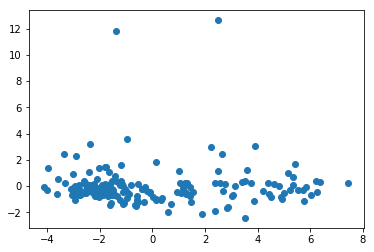

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(principalComponents_countries[:, 0], principalComponents_countries[:, 1])

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15)
cluster_vals = kmeans.fit_predict(standardized_data)

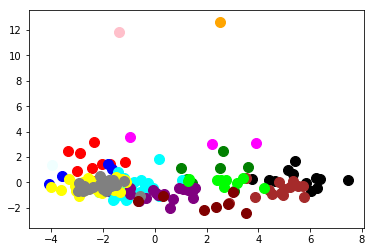

In [53]:
plt.scatter(principalComponents_countries[cluster_vals ==0,0], principalComponents_countries[cluster_vals == 0,1], s=100, c='red')
plt.scatter(principalComponents_countries[cluster_vals ==1,0], principalComponents_countries[cluster_vals == 1,1], s=100, c='black')
plt.scatter(principalComponents_countries[cluster_vals ==2,0], principalComponents_countries[cluster_vals == 2,1], s=100, c='blue')
plt.scatter(principalComponents_countries[cluster_vals ==3,0], principalComponents_countries[cluster_vals == 3,1], s=100, c='green')
plt.scatter(principalComponents_countries[cluster_vals ==4,0], principalComponents_countries[cluster_vals == 4,1], s=100, c='cyan')
plt.scatter(principalComponents_countries[cluster_vals ==5,0], principalComponents_countries[cluster_vals == 5,1], s=100, c='purple')
plt.scatter(principalComponents_countries[cluster_vals ==6,0], principalComponents_countries[cluster_vals == 6,1], s=100, c='orange')
plt.scatter(principalComponents_countries[cluster_vals ==7,0], principalComponents_countries[cluster_vals == 7,1], s=100, c='yellow')
plt.scatter(principalComponents_countries[cluster_vals ==8,0], principalComponents_countries[cluster_vals == 8,1], s=100, c='grey')
plt.scatter(principalComponents_countries[cluster_vals ==9,0], principalComponents_countries[cluster_vals == 9,1], s=100, c='brown')
plt.scatter(principalComponents_countries[cluster_vals ==10,0], principalComponents_countries[cluster_vals == 10,1], s=100, c='magenta')
plt.scatter(principalComponents_countries[cluster_vals ==11,0], principalComponents_countries[cluster_vals == 11,1], s=100, c='lime')
plt.scatter(principalComponents_countries[cluster_vals ==12,0], principalComponents_countries[cluster_vals == 12,1], s=100, c='pink')
plt.scatter(principalComponents_countries[cluster_vals ==13,0], principalComponents_countries[cluster_vals == 13,1], s=100, c='maroon')
plt.scatter(principalComponents_countries[cluster_vals ==14,0], principalComponents_countries[cluster_vals == 14,1], s=100, c='azure')

In [65]:
cv_sr = pd.Series(cluster_vals)
clusters = []
for i in range(15):
    clusters.append(country_data['Country'][cv_sr == i].to_list())

In [67]:
clusters

[['Brazil',
  'France',
  'Germany',
  'Italy',
  'Japan',
  'Mexico',
  'Russian Federation',
  'Spain',
  'United Kingdom'],
 ['Afghanistan',
  'Burkina Faso',
  'Burundi',
  'Chad',
  "Cote d'Ivoire",
  'Ethiopia',
  'Guinea',
  'Mali',
  'Mauritania',
  'Mozambique',
  'Niger',
  'Senegal'],
 ['Belarus',
  'Jamaica',
  'Lebanon',
  'Mongolia',
  'Thailand',
  'Trinidad and Tobago',
  'Ukraine',
  'Vietnam'],
 ['Djibouti',
  'Equatorial Guinea',
  'Eritrea',
  'Gambia',
  'Kenya',
  'Myanmar',
  'Nigeria',
  'Sudan',
  'Syria'],
 ['Antigua and Barbuda',
  'Argentina',
  'Aruba',
  'Bahamas',
  'Bolivia',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Dominica',
  'Dominican Republic',
  'Ecuador',
  'Egypt',
  'El Salvador',
  'Fiji',
  'Guatemala',
  'Honduras',
  'Mauritius',
  'Palau',
  'Panama',
  'Paraguay',
  'Peru',
  'Philippines',
  'Portugal',
  'Tonga',
  'Turkey',
  'Uruguay',
  'Venezuela'],
 ['Algeria',
  'Belize',
  'Bhutan',
  'Botswana',
  'Guyana',
  'Kiribati',
  'M

In [68]:
education_data = standardized_data[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23]]
cluster_vals_ed = kmeans.fit_predict(education_data)
cv_sr_ed = pd.Series(cluster_vals_ed)
clusters_ed = []
for i in range(15):
    clusters_ed.append(country_data['Country'][cv_sr_ed == i].to_list())
clusters_ed

[['Afghanistan',
  'Burkina Faso',
  "Cote d'Ivoire",
  'Ethiopia',
  'Guinea',
  'Mali',
  'Mauritania',
  'Mozambique',
  'Niger',
  'Senegal',
  'Sierra Leone'],
 ['Antigua and Barbuda',
  'Aruba',
  'Bahamas',
  'Brunei Darussalam',
  'China',
  'Dominica',
  'Egypt',
  'Fiji',
  'Hong Kong SAR, China',
  'Indonesia',
  'Iran',
  'Ireland',
  'Jordan',
  'Libya',
  'Liechtenstein',
  'Macao (Macau) SAR, China',
  'Malaysia',
  'Mauritius',
  'Oman',
  'Panama',
  'Samoa',
  'Saudi Arabia',
  'Seychelles'],
 ['Algeria',
  'Belize',
  'Kiribati',
  'Morocco',
  'Namibia',
  'Suriname',
  'Tunisia'],
 ['Angola',
  'Benin',
  'Burundi',
  'Cameroon',
  'Comoros',
  'Congo',
  'Equatorial Guinea',
  'Gabon',
  'Guinea-Bissau',
  'Iraq',
  'Madagascar',
  'Malawi',
  'Sao Tome and Principe',
  'Togo',
  'Uganda'],
 ['Belgium',
  'Canada',
  'Cuba',
  'Denmark',
  'Estonia',
  'Finland',
  'France',
  'Georgia',
  'Greece',
  'Iceland',
  'Israel',
  'Latvia',
  'Netherlands',
  'New Zeal

In [69]:
economic_data = standardized_data[[0, 14, 15, 16, 17, 18, 19]]
cluster_vals_ec = kmeans.fit_predict(economic_data)
cv_sr_ec = pd.Series(cluster_vals_ec)
clusters_ec = []
for i in range(15):
    clusters_ec.append(country_data['Country'][cv_sr_ec == i].to_list())
clusters_ec

[['Lesotho', 'South Africa'],
 ['Angola',
  'Bolivia',
  'Burundi',
  'Cameroon',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Congo',
  'Equatorial Guinea',
  'Ethiopia',
  'Guatemala',
  'Guinea',
  'Kenya',
  'Liberia',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mozambique',
  'Nigeria',
  'Rwanda',
  'Sierra Leone',
  'Tanzania',
  'Togo',
  'Uganda'],
 ['China'],
 ['Austria',
  'Belgium',
  'Brunei Darussalam',
  'Denmark',
  'Finland',
  'Hong Kong SAR, China',
  'Iceland',
  'Ireland',
  'Israel',
  'Kuwait',
  'Netherlands',
  'New Zealand',
  'Qatar',
  'Singapore',
  'Sweden',
  'United Arab Emirates'],
 ['India'],
 ['Brazil', 'Indonesia', 'Russian Federation'],
 ['Azerbaijan',
  'Bahrain',
  'Belarus',
  'Belize',
  'Bhutan',
  'Ecuador',
  'El Salvador',
  'Jamaica',
  'Kazakhstan',
  'Kyrgyz Republic',
  'Lebanon',
  'Portugal',
  'Romania',
  'Serbia',
  'Suriname',
  'Swaziland',
  'Syria',
  'Timor-Leste',
  'Trinidad and Tobago',
  'Vietnam'],
 ['Bermuda',
  '